In [1]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 
from skimage import io 
import seaborn as sns 

class InvalidKernelException(Exception):
    def __init__(self):
        self.message = 'The kernel dimensions must be odd.'
        super().__init__()

class Transformer():
    
    def __init__(self, img: np.array, kernel: np.array):
        self.img = img 
        self.kernel = kernel 
        self.kernel_xdim, self.kernel_ydim = kernel.shape 
        self.img_xdim, self.img_ydim = img.shape
        self.row_border = int((self.kernel_ydim - 1)/2) 
        self.col_border = int((self.kernel_xdim - 1)/2) 

        if self.kernel_xdim%2 == 0 or self.kernel_ydim%2 == 0:
            raise InvalidKernelException()
    
    @property
    def padded_image(self):
        xdim = self.img_xdim + int(2*self.col_border) 
        ydim = self.img_ydim + int(2*self.row_border) 

        padded_img = np.zeros((xdim, ydim))
        img_lower_x, img_upper_x = int(self.row_border), int(self.img_xdim - self.row_border) 
        img_lower_y, img_upper_y = int(self.col_border), int(self.img_ydim - self.col_border) 

        padded_img[img_lower_x:img_upper_x+2, img_lower_y:img_upper_y+2] = self.img 

        return padded_img
    
    def N8(self, x, y):
        lower_x, upper_x = int(x - self.row_border), int(x + self.row_border) 
        lower_y, upper_y = int(y - self.col_border), int(y + self.col_border)
        return self.padded_image[lower_x:upper_x+1, lower_y:upper_y+1]
    

    def transform(self, convolute = False):
        if convolute:
            kernel = np.flip(self.kernel, axis = 1)
        else: kernel = self.kernel 
        
        img = self.padded_image
        x, y = img.shape  
        x_init, x_terminate = self.row_border, x - self.row_border - 1
        y_init, y_terminate = self.col_border, y - self.col_border - 1

        for i in range(y_init, y_terminate+1):
            for j in range(x_init, x_terminate + 1):
                img[j, i] = np.sum(kernel*self.N8(j, i)) 
        
        img = img[x_init:x_terminate+1, y_init:y_terminate+1]
        return img 

img = io.imread('static/pretty.jpeg', as_gray = True)
kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
cv = Transformer(img = img, kernel = kernel)

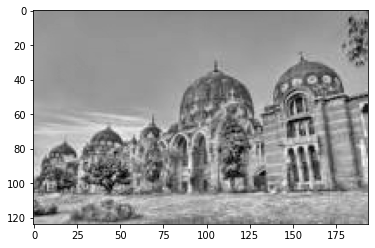

In [4]:
plt.imshow(img, cmap = 'gray') 
plt.show()

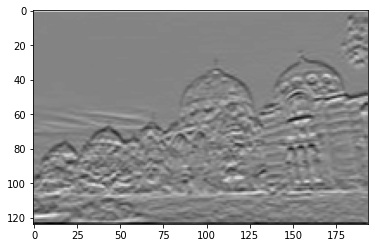

In [2]:

plt.imshow(cv.transform(convolute = True), cmap='gray') 
plt.show()


49000.0